# **CV Lab 5: Image Registration**

Name: Shwetha Iyer

Batch: A4

PRN: 1032211195


In [22]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

Text(0.5, 1.0, 'Target')

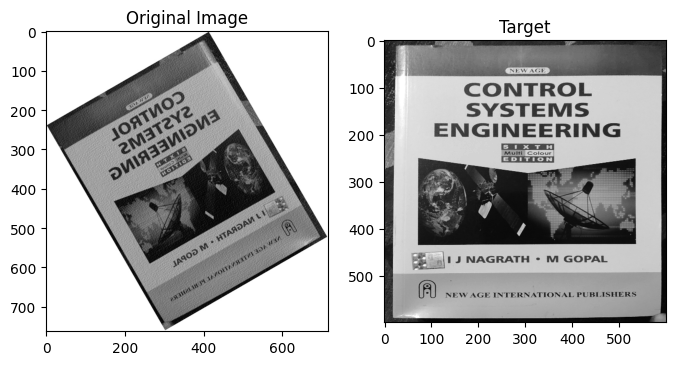

In [23]:
img1 = cv2.imread('Picture1.jpg',0)
#img1 = cv2.resize(img1, (500,750))

img2 = cv2.imread('/content/control-system-engineering.jpg',0)
img2 = cv2.resize(img2, (600,600))

figure, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(img1, cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(img2, cmap='gray')
ax[1].set_title("Target")

# **Compute Keypoints and Descriptors**

Descriptors:
 [[  4.   5.   3. ...   0.   0.   1.]
 [  0.   6.  73. ...   0.   0.   3.]
 [  0.   0.   6. ...   0.   0.   0.]
 ...
 [  0.   5. 182. ...   0.   0.   3.]
 [  0.  10. 100. ...   0.   0.   4.]
 [  4.   9.   3. ...   0.   0.   0.]]


Text(0.5, 1.0, 'Keypoints')

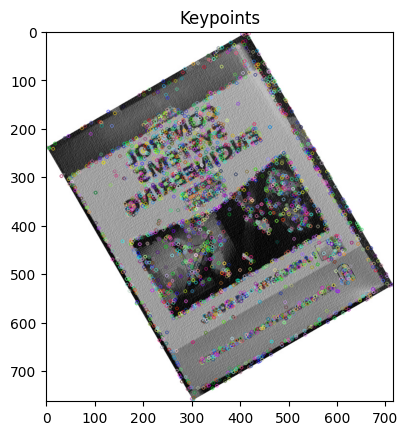

In [24]:
#keypoints
sift = cv2.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
img_1 = img1.copy()
img_1 = cv2.drawKeypoints(img1,keypoints_1,img_1)
print("Descriptors:\n",descriptors_1)
plt.imshow(img_1)
plt.title("Keypoints")

# **ORB (Oriented FAST and Rotated BRIEF)**

In [25]:
#ORB (Oriented FAST and Rotated BRIEF)
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

len(kp1), len(kp2)

(500, 500)

Text(0.5, 1.0, 'Feature Matching using ORB')

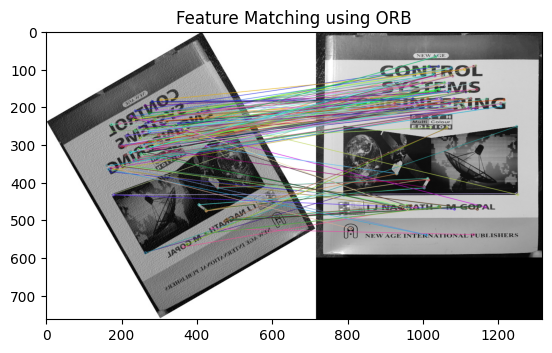

In [26]:
#Matching the keypoints (features)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)

#Picking the top 1500 matches
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:1500], img2, flags=2)
plt.imshow(img3)
plt.title("Feature Matching using ORB")

# ***Homography Transform (ORB)***

In [27]:
#Finding homography transform
src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 25.0)
print("Homography Transform:\n",M)

Homography Transform:
 [[-1.04748353e+00  5.51799842e-01  4.37680896e+02]
 [ 4.31607678e-01  7.39837014e-01 -1.69861839e+02]
 [-1.24422793e-04 -1.18074509e-04  1.00000000e+00]]


Text(0.5, 1.0, 'Aligned Image')

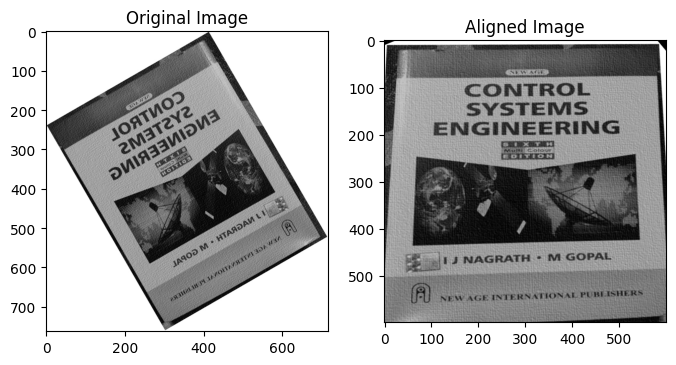

In [28]:
#Applying transform to 1st image
aligned_img = cv2.warpPerspective(img1, M, (img2.shape[1], img2.shape[0]))

figure, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(img1, cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(aligned_img, cmap='gray')
ax[1].set_title("Aligned Image")

# **SIFT (Scale Invarient Feature Transform)**

In [29]:
#SIFT (Scale Invarient Feature Transform)
sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

len(keypoints_1), len(keypoints_2)

(2724, 1735)

Text(0.5, 1.0, 'Feature Matching using SIFT')

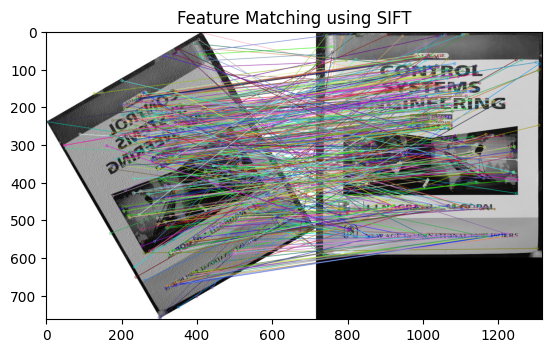

In [30]:
#Matching the keypoints (features)
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:1500], img2, flags=2)
plt.imshow(img3)
plt.title("Feature Matching using SIFT")

# ***Homography Transform (SIFT)***

In [31]:
#Finding homography transform
src_pts = np.float32([keypoints_1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints_2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
print("Homography Transform:\n",M)

Homography Transform:
 [[-1.10493753e+00  6.22614765e-01  4.49806237e+02]
 [ 4.58824143e-01  8.45320944e-01 -1.95408871e+02]
 [-6.80108474e-05  7.13741952e-07  1.00000000e+00]]


Text(0.5, 1.0, 'Aligned Image')

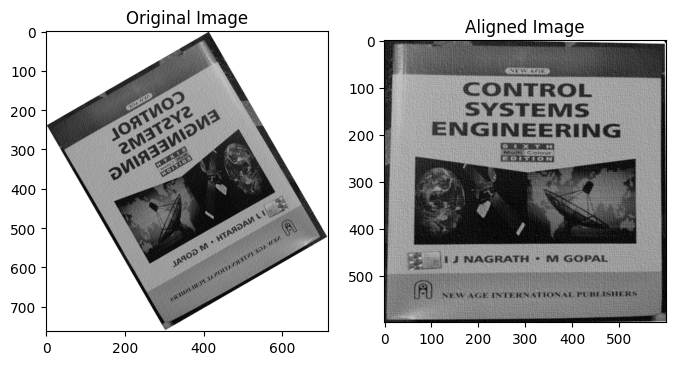

In [32]:
#Applying transform to 1st image
aligned_img = cv2.warpPerspective(img1, M, (img2.shape[1], img2.shape[0]))
figure, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(img1, cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(aligned_img, cmap='gray')
ax[1].set_title("Aligned Image")